In [1]:
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN

def extract_face(filename, required_size=(160, 160)):
    # load image from file
    image = Image.open(filename)
    
    # convert to RGB, if needed
    image = image.convert('RGB')
    
    # convert to array
    pixels = asarray(image)
    
    # create the detector, using default weights
    detector = MTCNN()
    
    # detect faces in the image
    results = detector.detect_faces(pixels)
    
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    
    # extract the face
    face = pixels[y1:y2, x1:x2]
    
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    
    return face_array

1 (160, 160, 3)
2 (160, 160, 3)
3 (160, 160, 3)
4 (160, 160, 3)
5 (160, 160, 3)
6 (160, 160, 3)
7 (160, 160, 3)
8 (160, 160, 3)
9 (160, 160, 3)
10 (160, 160, 3)
11 (160, 160, 3)
12 (160, 160, 3)
13 (160, 160, 3)


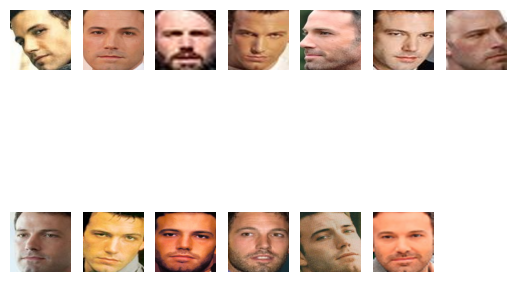

In [2]:
from os import listdir
from matplotlib import pyplot

# specify folder to plot
folder = '5-celebrity-faces-dataset/train/ben_afflek/'
i = 1

# enumerate files
for filename in listdir(folder):
    # path
    path = folder + filename
    
    # get face
    face = extract_face(path)
    print(i, face.shape)
    
    # plot
    pyplot.subplot(2, 7, i)
    pyplot.axis('off')
    pyplot.imshow(face)
    i += 1

pyplot.show()

In [3]:
from os import listdir


def load_faces(directory):
    """
    Load and extract faces from all images in a directory.
    
    Args:
        directory (str): Path to directory containing face images
        
    Returns:
        list: List of face arrays extracted from images
    """
    faces = list()
    
    # enumerate files
    for filename in listdir(directory):
        # path
        path = directory + filename
        
        # get face
        face = extract_face(path)
        
        # store
        faces.append(face)
        
    return faces

In [4]:
from os import listdir
from os.path import isdir
from numpy import asarray


def load_dataset(directory):
    """
    Load a dataset that contains one subdirectory for each class, with images in each subdirectory.
    
    Args:
        directory (str): Path to main directory containing class subdirectories
        
    Returns:
        tuple: Arrays of (X, y) where X contains face arrays and y contains labels
    """
    X, y = list(), list()
    
    # enumerate folders, one per class
    for subdir in listdir(directory):
        # path
        path = directory + subdir + '/'
        
        # skip any files that might be in the dir
        if not isdir(path):
            continue
            
        # load all faces in the subdirectory
        faces = load_faces(path)
        
        # create labels
        labels = [subdir for _ in range(len(faces))]
        
        # summarize progress
        print('>loaded %d examples for class: %s' % (len(faces), subdir))
        
        # store
        X.extend(faces)
        y.extend(labels)
    
    return asarray(X), asarray(y)

In [5]:
from os import listdir
from os.path import isdir
from PIL import Image
from numpy import savez_compressed
from numpy import asarray
from mtcnn.mtcnn import MTCNN


def extract_face(filename, required_size=(160, 160)):
    """Extract a single face from a given photograph"""
    # load image from file
    image = Image.open(filename)
    
    # convert to RGB, if needed
    image = image.convert('RGB')
    
    # convert to array
    pixels = asarray(image)
    
    # create the detector, using default weights
    detector = MTCNN()
    
    # detect faces in the image
    results = detector.detect_faces(pixels)
    
    # Check if at least one face was detected
    if len(results) == 0:
        print(f"No se detectaron caras en la imagen: {filename}")
        return None
    
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    
    # bug fix
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    
    # extract the face
    face = pixels[y1:y2, x1:x2]
    
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    
    return face_array


def load_faces(directory):
    """Load images and extract faces for all images in a directory"""
    faces = list()
    
    # enumerate files
    for filename in listdir(directory):
        # path
        path = directory + filename
        
        # get face
        face = extract_face(path)
        
        # store
        faces.append(face)
        
    return faces

def load_dataset(directory):
    """Load a dataset that contains one subdir for each class"""
    X, y = list(), list()
    
    # enumerate folders, one per class
    for subdir in listdir(directory):
        # path
        path = directory + subdir + '/'
        
        # skip any files that might be in the dir
        if not isdir(path):
            continue
        
        # load all faces in the subdirectory
        faces = load_faces(path)
        
        # create labels
        labels = [subdir for _ in range(len(faces))]
        
        # summarize progress
        print('>loaded %d examples for class: %s' % (len(faces), subdir))
        
        # store
        X.extend(faces)
        y.extend(labels)

    return asarray(X), asarray(y)

# Cargar dataset de entrenamiento
trainX, trainy = load_dataset('5-celebrity-faces-dataset/train/')
print('Dataset de entrenamiento:', trainX.shape, trainy.shape)

# Cargar dataset de validación
testX, testy = load_dataset('5-celebrity-faces-dataset/val/')
print('Dataset de validación:', testX.shape, testy.shape)

# Guardar arrays en un archivo comprimido
savez_compressed('5-celebrity-faces-dataset.npz', 
                trainX=trainX,
                trainy=trainy,
                testX=testX,
                testy=testy)

print('Dataset guardado en: 5-celebrity-faces-dataset.npz')

>loaded 13 examples for class: ben_afflek
>loaded 16 examples for class: elton_john
>loaded 21 examples for class: jerry_seinfeld
>loaded 19 examples for class: madonna
>loaded 22 examples for class: mindy_kaling
Dataset de entrenamiento: (91, 160, 160, 3) (91,)
>loaded 5 examples for class: ben_afflek
>loaded 5 examples for class: elton_john
>loaded 5 examples for class: jerry_seinfeld
>loaded 5 examples for class: madonna
>loaded 5 examples for class: mindy_kaling
Dataset de validación: (25, 160, 160, 3) (25,)
Dataset guardado en: 5-celebrity-faces-dataset.npz


In [6]:
from numpy import expand_dims


def get_embedding(model, face_pixels):
    """
    Obtiene el embedding de una cara a partir de un modelo preentrenado.

    Args:
    - model: El modelo preentrenado para calcular embeddings (por ejemplo, FaceNet).
    - face_pixels: Array de la imagen de la cara (160x160x3) ya recortada y redimensionada.

    Returns:
    - embedding: Vector de características (embedding) generado por el modelo.
    """
    # Escalar los valores de los píxeles a flotantes
    face_pixels = face_pixels.astype('float32')

    # Estandarizar los valores de los píxeles (normalización global)
    mean, std = face_pixels.mean(), face_pixels.std()
    face_pixels = (face_pixels - mean) / std

    # Transformar la imagen de la cara en una muestra para el modelo (batch de tamaño 1)
    samples = expand_dims(face_pixels, axis=0)

    # Predecir para obtener el embedding
    embedding = model.predict(samples)

    # Retornar el embedding como un vector de características
    return embedding[0]

In [7]:
from numpy import load, expand_dims, asarray, savez_compressed
import tensorflow as tf
import tensorflow_hub as hub


def get_embedding(model, face_pixels):
    # Resize the image to the required input size for the model
    face_pixels = tf.image.resize(face_pixels, (299, 299))
    # Cast pixel values to float32
    face_pixels = tf.cast(face_pixels, dtype=tf.float32)
    # Standardize pixel values across all channels (global)
    mean, std = tf.math.reduce_mean(face_pixels), tf.math.reduce_std(face_pixels)
    standardized_pixels = (face_pixels - mean) / std
    # Add batch dimension
    samples = tf.expand_dims(standardized_pixels, axis=0)
    # Get the embedding
    yhat = model(samples)
    return yhat[0]


# Cargar el conjunto de datos de rostros
data = load('5-celebrity-faces-dataset.npz')
trainX, trainy, testX, testy = data['trainX'], data['trainy'], data['testX'], data['testy']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

# Cargar el modelo Inception Resnet V2 preentrenado en VGGFace2 desde TensorFlow Hub
model_url = "https://tfhub.dev/google/imagenet/inception_resnet_v2/feature_vector/5"
model = hub.load(model_url)
print('Loaded Model from TensorFlow Hub')

# Convertir cada rostro en el conjunto de entrenamiento a una incrustación
newTrainX = []
for face_pixels in trainX:
    embedding = get_embedding(model, face_pixels)
    newTrainX.append(embedding)
newTrainX = asarray(newTrainX)
print('Training embeddings shape:', newTrainX.shape)

# Convertir cada rostro en el conjunto de prueba a una incrustación
newTestX = []
for face_pixels in testX:
    embedding = get_embedding(model, face_pixels)
    newTestX.append(embedding)
newTestX = asarray(newTestX)
print('Testing embeddings shape:', newTestX.shape)

# Guardar los arreglos en un archivo comprimido
savez_compressed('5-celebrity-faces-embeddings.npz', newTrainX, trainy, newTestX, testy)
print('Embeddings saved to 5-celebrity-faces-embeddings.npz')


Loaded:  (91, 160, 160, 3) (91,) (25, 160, 160, 3) (25,)



Loaded Model from TensorFlow Hub
Training embeddings shape: (91, 1536)
Testing embeddings shape: (25, 1536)
Embeddings saved to 5-celebrity-faces-embeddings.npz


In [17]:
from numpy import load
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split

# Cargar el dataset
data = load('5-celebrity-faces-embeddings.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Dataset: train=%d, test=%d' % (trainX.shape[0], testX.shape[0]))

# Normalizar los vectores de entrada
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)

# Codificar etiquetas (label encoding)
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)

# Ajuste de hiperparámetros para SVM
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],  # Incluye kernel radial
    'gamma': ['scale', 'auto']   # Sólo aplica para kernels no lineales
}
svc = SVC(probability=True)
grid = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')
grid.fit(trainX, trainy)

# Mejor modelo encontrado
best_model = grid.best_estimator_
print(f'Best parameters: {grid.best_params_}')

# Predicción con el mejor modelo
yhat_train = best_model.predict(trainX)
yhat_test = best_model.predict(testX)

# Métricas de rendimiento
score_train = accuracy_score(trainy, yhat_train)
score_test = accuracy_score(testy, yhat_test)

# Resultados
print(f'Accuracy: train={score_train*100:.3f}, test={score_test*100:.3f}')
print('\nClassification Report (Test):\n', classification_report(testy, yhat_test, target_names=out_encoder.classes_))

Dataset: train=91, test=25
Best parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: train=100.000, test=76.000

Classification Report (Test):
                 precision    recall  f1-score   support

    ben_afflek       0.75      0.60      0.67         5
    elton_john       1.00      0.60      0.75         5
jerry_seinfeld       0.71      1.00      0.83         5
       madonna       0.67      0.80      0.73         5
  mindy_kaling       0.80      0.80      0.80         5

      accuracy                           0.76        25
     macro avg       0.79      0.76      0.76        25
  weighted avg       0.79      0.76      0.76        25



Predicted: jerry_seinfeld (38.768%)
Expected: jerry_seinfeld


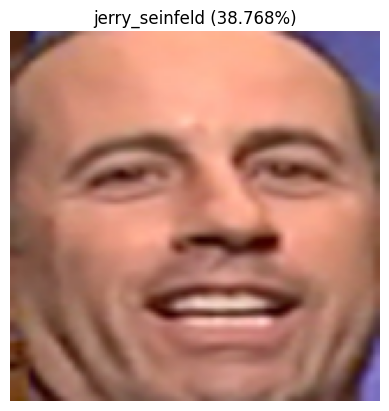

In [26]:
# Develop a classifier for the 5 Celebrity Faces Dataset
from random import choice
from numpy import load, expand_dims
from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.svm import SVC
from matplotlib import pyplot
import numpy as np

# Load the faces dataset
data_faces = load('5-celebrity-faces-dataset.npz')
testX_faces = data_faces['testX']  # Extract the test faces for visualization

# Load the face embeddings
data_embeddings = load('5-celebrity-faces-embeddings.npz')
trainX, trainy, testX, testy = (
    data_embeddings['arr_0'],
    data_embeddings['arr_1'],
    data_embeddings['arr_2'],
    data_embeddings['arr_3'],
)

# Normalize the input vectors
in_encoder = Normalizer(norm='l2')
trainX = in_encoder.transform(trainX)
testX = in_encoder.transform(testX)

# Encode the labels
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy = out_encoder.transform(trainy)
testy = out_encoder.transform(testy)

# Fit the SVC model
model = SVC(kernel='linear', probability=True)
model.fit(trainX, trainy)

# Test the model on a random example from the test dataset
selection = choice(range(testX.shape[0]))  # Randomly select a test example
random_face_pixels = testX_faces[selection]
random_face_emb = testX[selection]
random_face_class = testy[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])

# Predict the class for the selected face
samples = expand_dims(random_face_emb, axis=0)  # Expand dimensions to create batch
yhat_class = model.predict(samples)  # Predict class
yhat_prob = model.predict_proba(samples)  # Predict probabilities

# Extract prediction details
class_index = yhat_class[0]
class_probability = yhat_prob[0, class_index] * 100
predict_name = out_encoder.inverse_transform([class_index])

# Display results
print(f"Predicted: {predict_name[0]} ({class_probability:.3f}%)")
print(f"Expected: {random_face_name[0]}")

# Plot the selected face with prediction details
pyplot.imshow(np.clip(random_face_pixels, 0, 255).astype('uint8'))  # Ensure pixel values are valid
pyplot.title(f"{predict_name[0]} ({class_probability:.3f}%)")
pyplot.axis('off')
pyplot.show()